In [4]:
using Plots
using BandedMatrices
using Random
using MultiFloats
MultiFloats.use_bigfloat_transcendentals()
include("./phase.jl")
default(format = :png, dpi = 300, size = (600, 400))

In [5]:
function zeroe_obc(; L = 1001, rng = Random.GLOBAL_RNG, vartype = Float64)
    H = ham_sf_obc(L = L, rng = rng)
    H = Complex{vartype}.(BandedMatrix(H, (2, 2)));    
    @time begin
        Y = Array(@view H[:, 1])
        A = H[:, 2:end]
        X = A\Y
    end
    pushfirst!(X, 1.)    
    return X
end


zeroe_obc (generic function with 1 method)

In [27]:
seed = rand(1:50000)
L = 300001
setprecision(200)
var1 = Float64
var2 = Float64x2
var3 = Float64x8
psi = zeroe_obc(L = L, vartype = var1, rng = MersenneTwister(seed));
psi_2 = zeroe_obc(L = L, vartype = var2, rng = MersenneTwister(seed));
psi_4 = zeroe_obc(L = L, vartype = var3, rng = MersenneTwister(seed));


  0.040443 seconds (27 allocations: 86.976 MiB, 7.88% gc time)
  0.406433 seconds (28 allocations: 173.951 MiB, 0.57% gc time)
 11.301834 seconds (28 allocations: 695.802 MiB, 0.15% gc time)


In [29]:
p = plot(log10.(abs.(psi)), label = string(var1))
plot!(log10.(abs.(psi_2)), label = string(var2), lw = 2)
plot!(log10.(abs.(psi_4)), label = string(var3))

xlabel!("sites")
ylabel!("log(ψ)")

savefig(p, "linsolve_prec_benchmark.pdf")

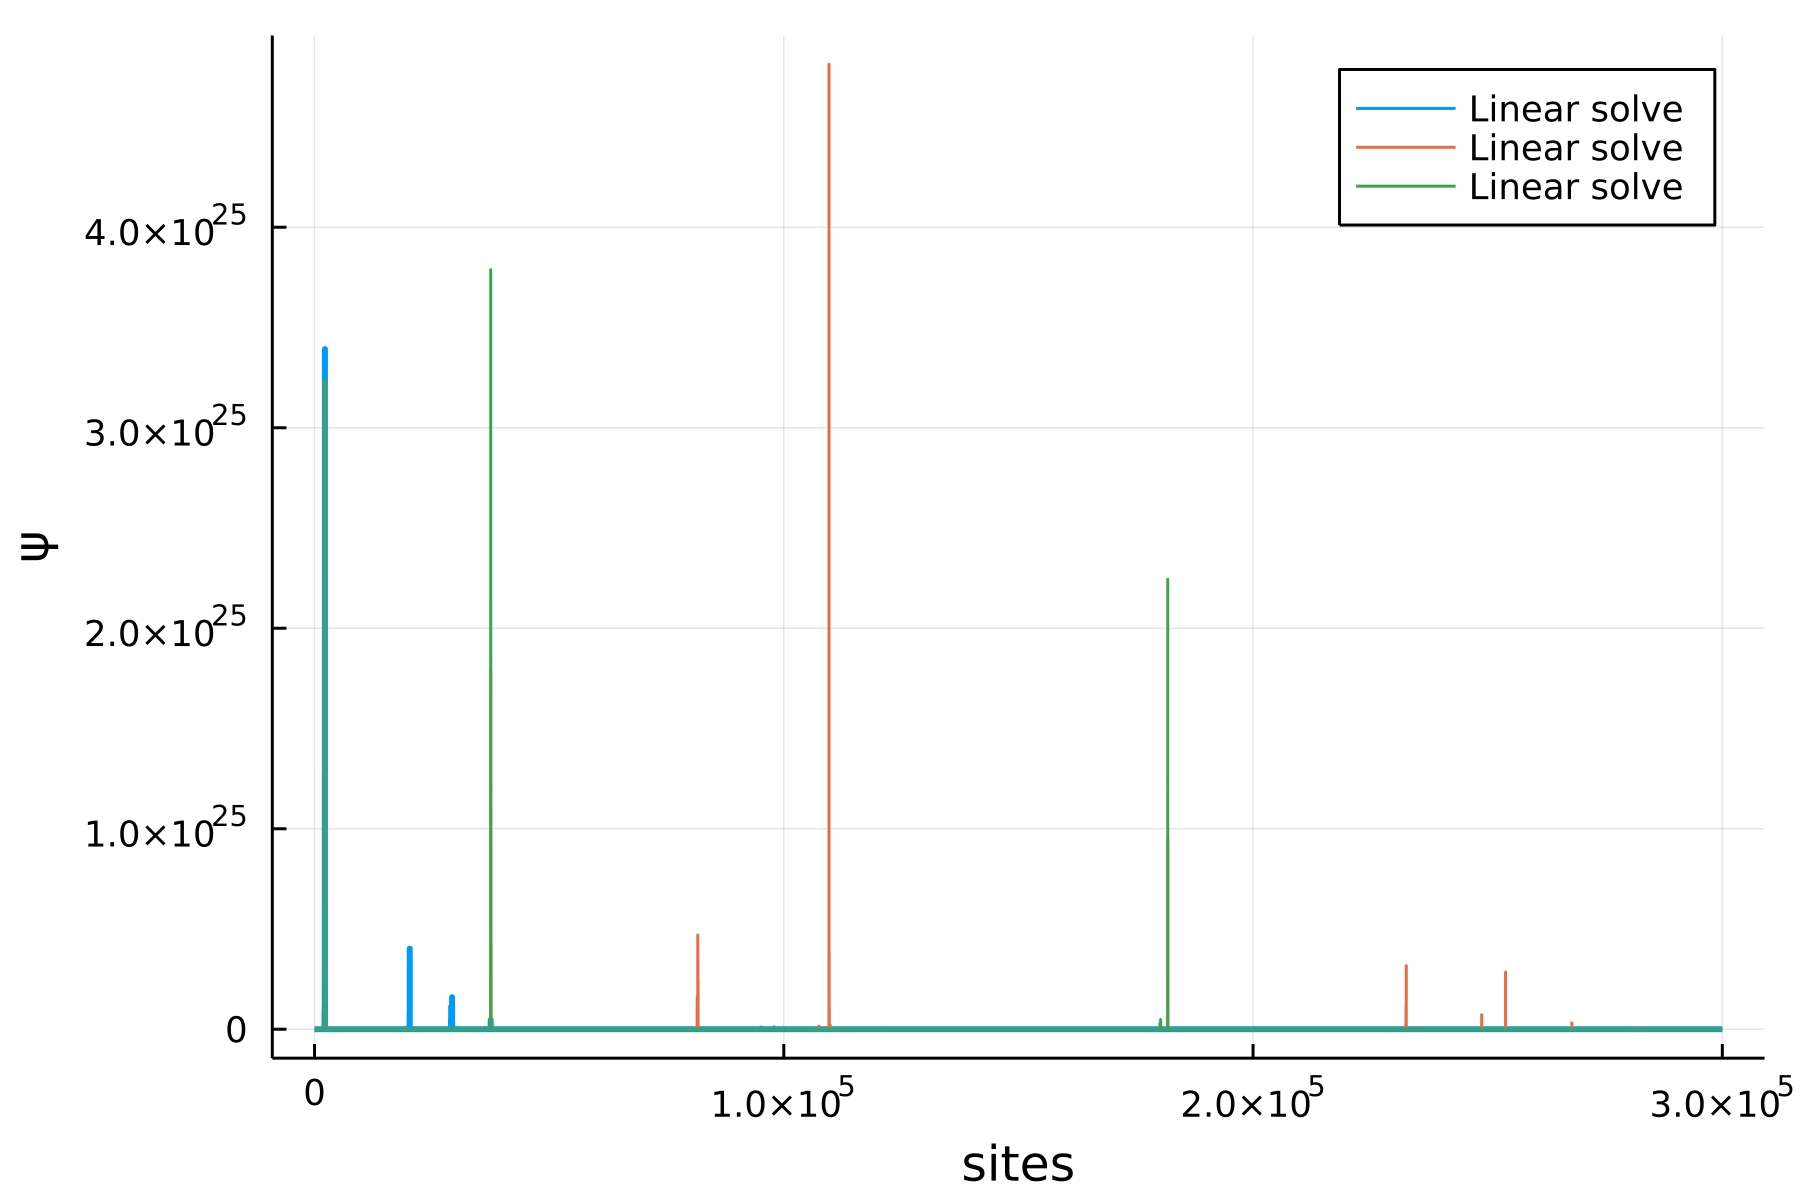

In [20]:
plot(abs.(psi), label = "Linear solve", lw = 2)
plot!(abs.(psi_2), label = "Linear solve")
plot!(abs.(psi_4), label = "Linear solve")


xlabel!("sites")
ylabel!("ψ")

In [168]:
string(Float64)

"Float64"